# Integer Programming

In [2]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

## Problem I
Consider the following linear programming model:

maximize: $Z = 5x_{1} + 4x_{2}$

subject:  $3x_{1} + 4x_{2} \leq 10 \ \ \ \ \ \ \ x_{1}, x_{2} \geq 0 \in N$ 

- Solve this model using the branch and bound method.
- Demonstrate the solution partitioning graphically.

In [3]:
x1 = cvx.Variable(integer=True)
x2 = cvx.Variable(integer=True)
Z = 5*x1 + 4*x2
constraints = [3*x1 + 4*x2 <= 10, x1 >= 0, x2 >= 0]

problem = cvx.Problem(cvx.Maximize(Z), constraints)
print('Optimal value: ', problem.solve(), 
      '\nx1 = ', x1.value, 
      '\nx2 = ', x2.value)

Optimal value:  15.0 
x1 =  3.0 
x2 =  0.0


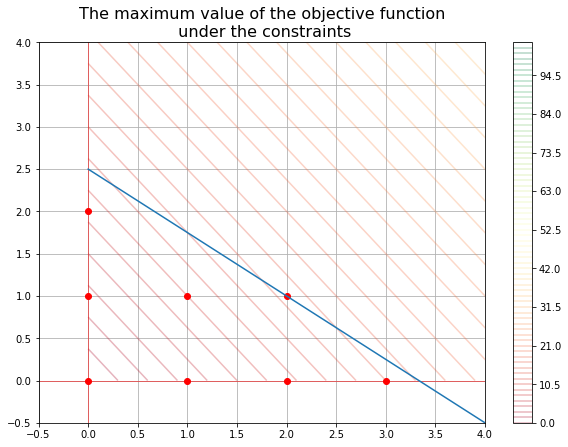

In [4]:
c1 = lambda x: 10/4 - (3/4)*x

x, y = np.linspace(0, 12), np.linspace(0, 12)
X, Y = np.meshgrid(np.arange(0, 12, .5), np.arange(0, 12, .5))
Z = 5*X + 4*Y
possible_set = np.array([[x, y] for x in [0,1,2,3] 
                         for y in [0,1,2,3] if 3*x + 4*y <= 10])

plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, 100, cmap='RdYlGn', alpha= .3)
plt.axhline(0, color='red', linewidth=.5)
plt.axvline(0, color='red', linewidth=.5)
plt.plot(possible_set.T[0], possible_set.T[1], 'ro')
plt.plot(x, c1(x))
plt.colorbar()
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
plt.grid(True)
plt.title('The maximum value of the objective function\n under the constraints',
          fontsize=16)
plt.show()

## Problem II
Solve the following linear programming model using the branch and bound method:

minimize: $Z = 3x_{1} + 6x_{2}$

subject:  $7x_{1} + 3x_{2} \leq 10 \ \ \ \ \ \ \ x_{1}, x_{2} \geq 0 \in N$ 



In [5]:
x1 = cvx.Variable(integer=True)
x2 = cvx.Variable(integer=True)
Z = 3*x1 + 6*x2
constraints = [7*x1 + 3*x2 >= 40, x1 >= 0, x2 >= 0]

problem = cvx.Problem(cvx.Minimize(Z), constraints)
print('Optimal value: ', problem.solve(), 
      '\nx1 = ', x1.value, 
      '\nx2 = ', x2.value)

Optimal value:  18.0 
x1 =  6.0 
x2 =  0.0


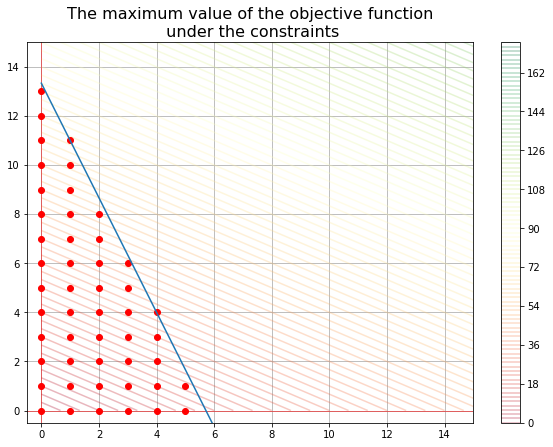

In [6]:
c1 = lambda x: 40/3 - (7/3)*x

x, y = np.linspace(0, 20), np.linspace(0, 20)
X, Y = np.meshgrid(np.arange(0, 20, .5), np.arange(0, 20, .5))
Z = 3*X + 6*Y
possible_set = np.array([[x, y] for x in list(range(15)) 
                         for y in list(range(15)) if 7*x + 3*y <= 40])

plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, 100, cmap='RdYlGn', alpha= .3)
plt.axhline(0, color='red', linewidth=.5)
plt.axvline(0, color='red', linewidth=.5)
plt.plot(possible_set.T[0], possible_set.T[1], 'ro')
plt.plot(x, c1(x))
plt.colorbar()
plt.xlim(-0.5, 15)
plt.ylim(-0.5, 15)
plt.grid(True)
plt.title('The maximum value of the objective function\n under the constraints',
          fontsize=16)
plt.show()

## Problem III
A tailor makes wool tweed sport coats and wool slacks. He is able to get a shipment of 150 square yards of wool cloth from Scotland each month to make coats and slacks, and he has 200 hours of his own labor to make them each month. A coat requires 3 square yards of wool and 10 hours to make, and a pair of pants requires 5 square yards of wool and 4 hours to make. He earns 50 USD in profit from each coat he makes and $40 from each pair of slacks. He wants to know how many coats
and slacks to produce to maximize profit.
- Formulate an integer linear programming model for this problem.
- Determine the integer solution to this problem using the branch and bound method.

Compare this solution with the solution without integer restrictions and indicate if the rounded-down solution would have been optimal.

In [7]:
'''
Results without imposing the variables to be integers:

Optimal value:  1473.6842103374033 
x1 =  10.52631578438763 
x2 =  23.684210527950544
'''

x1 = cvx.Variable(integer=True)
x2 = cvx.Variable(integer=True)

Z = 50*x1 + 40*x2

constraints = [
    3*x1 + 5*x2 <= 150,
    10*x1 + 4*x2 <= 200,
    x1 >= 0, x2 >= 0]

problem = cvx.Problem(cvx.Maximize(Z), constraints)
print('Optimal value: ', problem.solve(), 
      '\ncoats = ', x1.value, 
      '\nslacks = ', x2.value)

Optimal value:  1460.0 
coats =  10.0 
slacks =  24.0
